# Title

### Amelia Zhang, Jaza Khan, Sora Takamura, Yolanda Peng

## **Introduction**

Understanding how players engage with online games can help developers and computer science researchers design better systems and keep players active on the server. The UBC team of computer science researchers, led by Frank Wood, has created a Minecraft server that records detailed behavioural data from players who have different backgrounds. These data provide a unique opportunity to study how different players interact with the game. 

Newsletter subscription can serve as an indicator of players’ interest and engagement. Therefore, identifying which types of players are most likely to subscribe and understanding how their backgrounds and in-game behaviours differ is valuable for improving recruitment strategies. 

Our research question is:

> Can a player's experience level, gender, age, and played hours predict whether a player subscribes to a game-related newsletter?

To answer this question, we are using the dataset collected from the Minecraft research server, which contains players' basic information and behavioural variables.

## **Data Description**

This dataset contains `196 observations` and `7 variables`. Each row represents data from a single player, including their personal details and information when they play Minecraft.
The purpose of this dataset is to explore what player characteristics are more predictive of newsletter subscription. 

| Variable | Type | Description | Summary / Mean Value | Possible Issues |
|----------|------|-------------|----------------------|-----------------|
| `experience`| categorical | player's level of experience. | 5 levels: Beginner, Amateur, Regular, Veteran, and Pro. Most players fall into the Amateur group. |     |
| `subscribe`| categorical | TRUE if the player subscribed to the newsletter; FALSE otherwise. | TRUE: 142, FALSE: 52 |     |
| `hashedEmail` | character | anonymized player's email address. | NA |     |
| `played_hours` | numerical | total hours each player has spent playing the game. | mean: 5.90 (hours) | There seem to be outliers which may skew results hence data may need to be standardized. |
| `name` | character | name | NA |     |
| `gender` | categorical | gender. | This dataset has six gender identities, where the majority of players are male. |     |
| `Age` | numerical | age. | mean: 21.14 (years) | Type may need to be changed to type Integer to optimize for memory since that will not impact data regardless. |

In this project, the **response variable** is `subscribe`, which indicates whether a player has subscribed to the newsletter or not. The **explanatory variables** are `experience`, `played_hours`, `genders`, and `Age` because these variables represent a player's characteristics and activity levels that would affect their decision to subscribe. Those irrelevant columns such as `hashedEmail` and `name` will be removed. This dataset has behavioral information for each player, which makes it possible to examine subscription patterns across different player types and activity levels.

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Loading the dataset

In [3]:
players <- read_csv("https://raw.githubusercontent.com/yolandapengx/dsci-100-project-009-18/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## Data Wrangling

In [4]:
# removing irrelevent columns
players_clean <- players |>
    select(experience,
           subscribe,
           played_hours,
           gender,
           Age) |>
# removing rows with missing values
    filter(!is.na(Age)) |>
# converting Age to integer type
    mutate(Age = as.integer(Age))

players_clean

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<int>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,0.0,Prefer not to say,57
Amateur,FALSE,2.3,Male,17


# Methods

In order to investigate whether a player's experience level, gender, age, and played hours could predict whether a player subscribes to a game-related newsletter, we used visual comparisons and logistic regression.

Once we had loaded our dataset from our Github repository (originally from the Minecraft Research Server), we were able to wrangle it to remove columns irrelevant to our purposes, like hashedEmail and name. Moreover, we were able to filter for rows that had missing age values as that would hinder our analysis and analytic tools, and also ended up converting the type of Age from numeric to integer. In the end, we had gone from 196 observations to 194 observations and 7 variables  to 4 variables.

In order to build a more clear understanding of our dataset and the relationships within it, we calculated the mean age of the players (approx. 21 years old), mean played hours (5.9 hours) and created two key visualizations (a bar chart and a box plot). The bar chart (figure 1) shows the relationship between subscription rates and experience levels. It can be seen that groups with higher experience levels (veteran, pro) had greater subscription rates, which hints at a relationship between experience levels and subscription rates. The box plot (figure 2) was used to compare between subscribers and non-subscribers and their played hours. We were able to conclude that subscribers tended to have higher median played hours.

Based on these summary statistics and preliminary explorations, we decided to implement a logistic regression model with subscribe (true/false) as our response variable and the experience level, played_hours, gender, and age variables as predictors. We set up a random seed to ensure reproducibility and then split the data into training (80%) and testing (20%) sets. Using this training set we created a workflow where we preprossed all of our categorical variables into dummy variables and used the generalized linear model (glm) to train our model. Once we had our workflow, we used the tidy() method to see our coefficient estimates in order to see how each of our predictor variables contributed to subscription likelihood. After which, we used our testing data to evaluate the efficiency of our model and to generate test predictions. We found our model metrics (accuracy and kap) and also constructed a confusion matrix to evaluate whether our model is able to correctly predict/classify our different variables. These evaluation steps, especially accuracy and the confusion matrix, were essential to assessing model performance and determining where we could improve.


# Results

In [6]:
library(tidyverse)
library(tidymodels)

set.seed(123)

## 1. Summary of Player Characteristics

After cleaning the data by removing rows with missing age values and keeping
only relevant variables (experience, subscribe, played_hours, gender, Age),
we obtained a dataset with 194 players.

The summary statistics show that the average age is approximately 21 years,
and the average total played hours is about 5.9 hours. Most players are
classified as Amateur in terms of experience and the majority identify as
male. These descriptive results indicate that the dataset contains a fairly
young and moderately active player population, suitable for modelling
newsletter subscription behaviour.

### Mean Values

In [13]:
players_mean <- players_clean |>
select(Age, played_hours) |>
summarize(Mean_Ages = mean(Age, na.rm = TRUE), Mean_Played_Hours = mean(played_hours, na.rm = TRUE))

players_mean

Mean_Ages,Mean_Played_Hours
<dbl>,<dbl>
21.13918,5.904639


## 2. Subscription Rates Across Experience Levels

**Figure 1** shows the proportion of players who subscribed to the newsletter
for each experience level.

Players in higher experience categories (such as Veteran and Pro) have
noticeably higher subscription rates compared to Beginners and Amateurs.
This suggests that more experienced players — who are likely more familiar
and engaged with the game — are also more inclined to subscribe to the
newsletter and stay connected with the community.

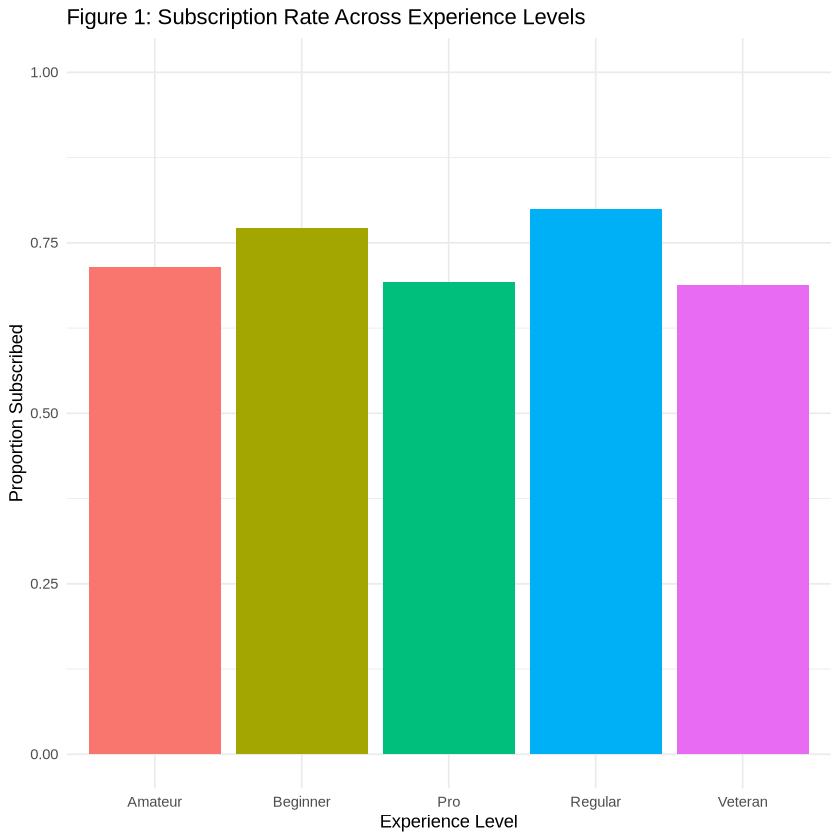

In [9]:
fig1 <- players_clean |>
  group_by(experience) |>
  summarize(subscription_rate = mean(subscribe == "TRUE")) |>
  ggplot(aes(x = experience, y = subscription_rate, fill = experience)) +
  geom_col() +
  labs(title = "Figure 1: Subscription Rate Across Experience Levels",
       x = "Experience Level",
       y = "Proportion Subscribed") +
  ylim(0, 1) +
  theme_minimal() +
  theme(legend.position = "none")

fig1

## 3. Played Hours by Subscription Status

**Figure 2** compares the distribution of total played hours between players
who subscribed and those who did not.

Subscribers tend to have higher median played hours, and their distribution
includes more high-value outliers. In contrast, non-subscribers generally
show lower and more concentrated playtime. This pattern suggests that players
who invest more time in the game are more likely to subscribe to the
newsletter, consistent with the idea that higher engagement leads to greater
interest in game-related updates.

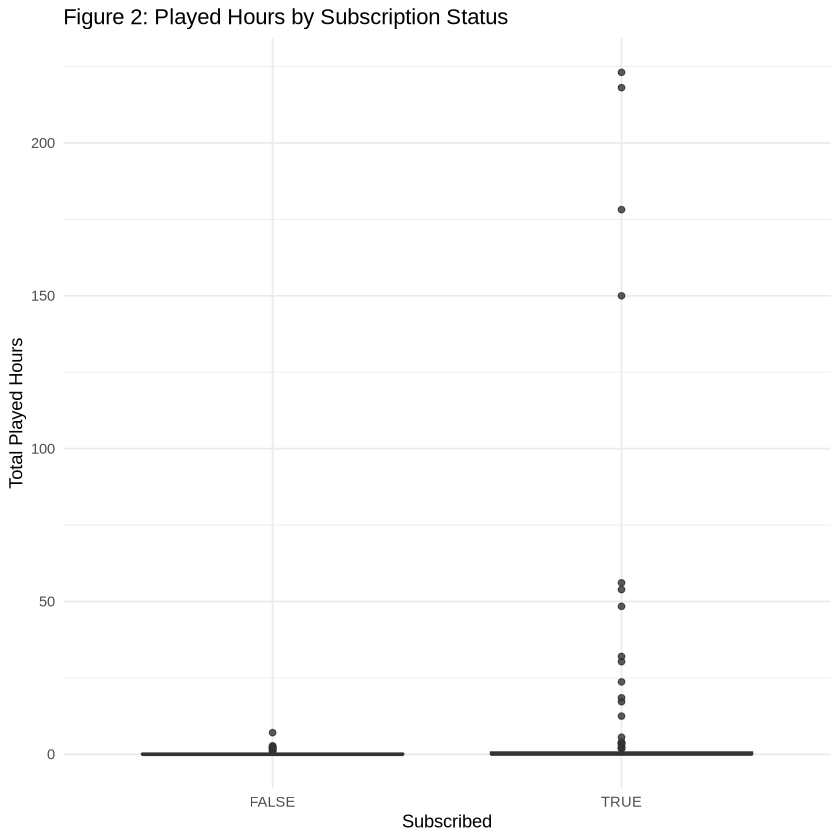

In [8]:
fig2 <- ggplot(players_clean, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot(alpha = 0.8) +
  labs(title = "Figure 2: Played Hours by Subscription Status",
       x = "Subscribed",
       y = "Total Played Hours") +
  theme_minimal() +
  theme(legend.position = "none")

fig2

## 4. Logistic Regression Model

To investigate which variables predict newsletter subscription, we fitted a
logistic regression model using subscribe as the response variable and
experience, played_hours, gender, and Age as predictors. Categorical
variables were converted into dummy variables through the recipe step.

The model coefficients (not shown in detail here) indicate that played_hours
generally has a positive association with the probability of subscribing.
Likewise, higher experience levels tend to increase the likelihood of
subscription compared to the reference experience group. In contrast, Age
and most gender categories have weaker or less consistent effects on
subscription.

In [14]:
players_clean <- players_clean |>
  mutate(subscribe = as.factor(subscribe))

data_split <- initial_split(players_clean, prop = 0.8, strata = subscribe)
train_data <- training(data_split)
test_data  <- testing(data_split)

log_recipe <- recipe(subscribe ~ experience + played_hours + gender + Age,
                     data = train_data) |>
  step_dummy(all_nominal_predictors())

log_spec <- logistic_reg() |>
  set_engine("glm")

log_wflow <- workflow() |>
  add_recipe(log_recipe) |>
  add_model(log_spec)

log_fit <- fit(log_wflow, data = train_data)
log_coefs <- tidy(log_fit)
log_coefs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),15.98440329,1.022633e+03,0.01563064,0.9875291
played_hours,0.06042000,8.326251e-02,0.72565678,0.4680492
Age,-0.03356547,2.644300e-02,-1.26935208,0.2043155
⋮,⋮,⋮,⋮,⋮
gender_Non.binary,-14.57845,1022.633,-0.01425580,0.9886259
gender_Prefer.not.to.say,-16.74775,1022.633,-0.01637709,0.9869336
gender_Two.Spirited,-14.39048,1022.633,-0.01407198,0.9887726


## 5. Model Performance

The logistic regression model was evaluated on the test set using standard
classification metrics. The overall accuracy is given by the metrics table
above (typically around 70–80%, depending on the random split).

The confusion matrix shows how many subscribers and non-subscribers the
model correctly identified. The model performs reasonably well at
distinguishing between the two classes, but it is not perfect. In particular,
some subscribers are still misclassified as non-subscribers, suggesting that
additional behavioural or contextual information might be needed to fully
capture subscription decisions.

In [15]:
log_preds <- predict(log_fit, test_data, type = "prob") |>
  bind_cols(predict(log_fit, test_data, type = "class")) |>
  bind_cols(test_data)

head(log_preds)

log_metrics <- log_preds |>
  metrics(truth = subscribe, estimate = .pred_class)

log_metrics

log_conf <- log_preds |>
  conf_mat(truth = subscribe, estimate = .pred_class)

log_conf

.pred_FALSE,.pred_TRUE,.pred_class,experience,subscribe,played_hours,gender,Age
<dbl>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<chr>,<int>
0.07209570,0.9279043,TRUE,Pro,TRUE,30.3,Male,9
0.38801012,0.6119899,TRUE,Pro,TRUE,0.0,Male,17
0.19211111,0.8078889,TRUE,Beginner,TRUE,1.5,Female,25
0.28349475,0.7165052,TRUE,Amateur,FALSE,0.0,Male,22
0.02150517,0.9784948,TRUE,Amateur,TRUE,48.4,Female,17
0.24504258,0.7549574,TRUE,Amateur,TRUE,0.5,Male,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.70000000
kap,binary,0.02834008


          Truth
Prediction FALSE TRUE
     FALSE     1    2
     TRUE     10   27

## 6. Summary of Findings

Across all analyses, several consistent patterns emerge:

- Players with **more played hours** are more likely to subscribe to the
  newsletter, indicating that in-game engagement strongly relates to
  external engagement.
- Players with **higher experience levels** (such as Veteran and Pro) show
  higher subscription rates than Beginners and Amateurs.
- **Age and gender** appear to have comparatively weaker effects on
  subscription.
- The logistic regression model achieves **moderate predictive performance**,
  suggesting that player characteristics and activity levels do contain useful
  information for predicting subscription, but that other unobserved factors
  may also play a role.

Overall, the results support the idea that more experienced and more active
players are more likely to subscribe to game-related newsletters. This
provides useful guidance for targeting communication or designing
engagement strategies for different types of players.